# **DATA MODELLING**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## UNSUPERVISED LEARNING - Clustering

Lets look at a very simple example of unsupervised learning.

**Generate some dummy data using 'make_blobs'**

In [2]:
from sklearn.datasets import make_blobs
import pandas as pd

dataset, classes = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=1)

# make as panda dataframe for easy understanding
df = pd.DataFrame(dataset, columns=['var1', 'var2'])
df.head()

,var1,var2
0,-5.580406,-3.419458
1,-1.994891,4.595272
2,-6.856231,-7.760843
3,-7.730858,-9.033572
4,-6.133458,-3.501834


In [ ]:
df.tail()

,var1,var2
195,-7.313989,-8.308721
196,-6.755613,-8.374814
197,-10.684271,-3.795769
198,-7.152759,-2.731391
199,-6.256407,-7.901858


**Visualise the data using a seaborn scatter plot**

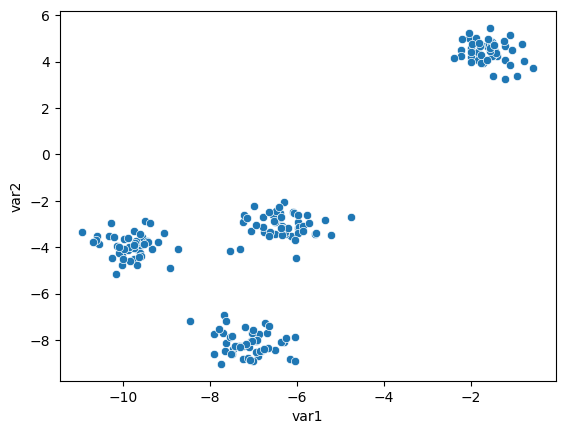

In [3]:
#importing the relevant library

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='var1', y='var2')
plt.show()

Clearly clustering would be an ideal solution, so lets try the K=means method.

Look at the documentation for the python library "sklearn kmeans clustering" for what the algorithm requires.

From the documentation the only input the algorithm requires is the number of clusters (k). It should be noted that while a random state is not required, it would be a good idea to set it for reproducablilty, we can just choose 0.

**Determine needed parameters**

The way to determine the optimal number of clusters is to use the elbow method. More information on how to impliment this method can be obtained by looking at the documentation for the elbow method in the python library yellowbrick by searching something like "yellowbrick elbow method".

So now let's follow the instructions and impliment the elbow method.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

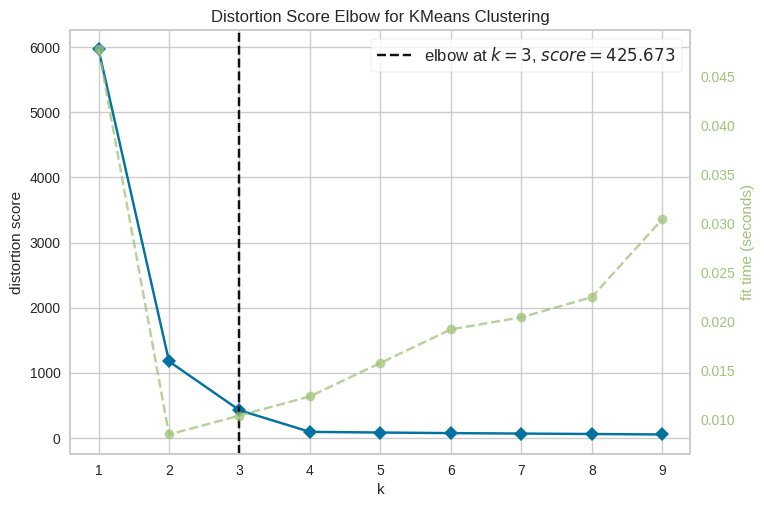

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualiser = KElbowVisualizer(model, k=(1,10), n_init=10) #n_init used to be 10 by default
visualiser.fit(df)
visualiser.show();

Determine where the elbow 'bends' (blue line) to the largest degree or the most obviously.

NOTE: if the data in not suitable for clustering, the method wont work well or even at all.

**Run the model**

Next, we implement the kmeans clusterning using the instructions in the sklearn kmeans documentation.

In [ ]:
kmeans =  KMeans(n_clusters=4)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

**Display the predicted cluster centers**

Lest see where the identified cluster centers are located using a print statement.

In [ ]:
kmeans.cluster_centers_

array([[-6.31763618, -3.05144652],
       [-1.60210776,  4.43325059],
       [-7.09782837, -8.13977826],
       [-9.84910277, -3.94875099]])

**Visualising cluster centers on data**

Finally lets fisualise the data using seaborn like before, but now also include the cluster centers on the plot.

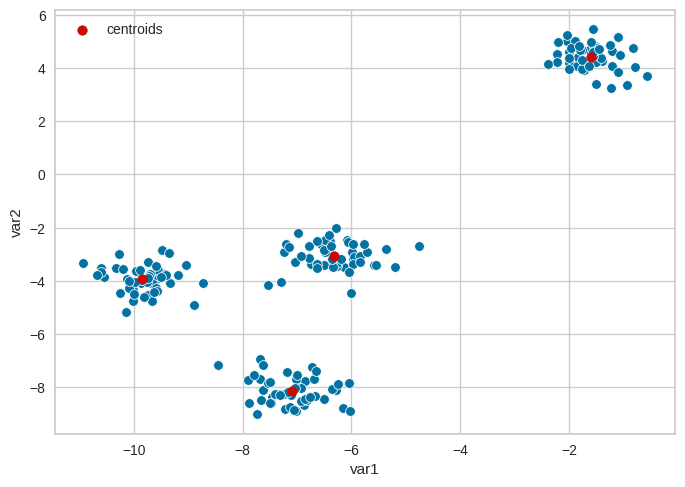

In [ ]:
sns.scatterplot(data=df, x='var1', y='var2');
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='o', c='r', label='centroids')
plt.legend()
plt.show()